In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [3]:
X = 6 * np.random.rand(200,1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.rand(200,1)

# Equation used in the code demo

# y =0.8x^2 + 0.9x + 2 + noise_points

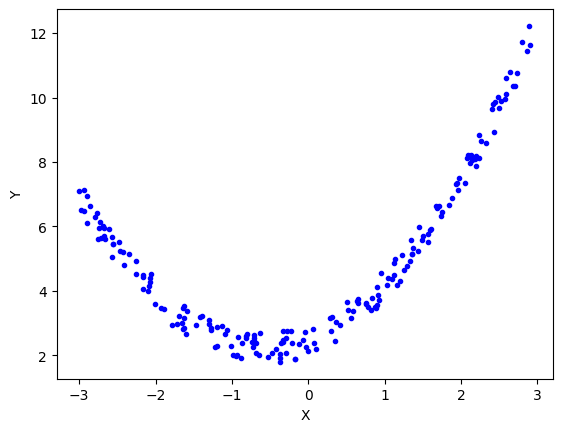

In [4]:
plt.plot(X,y,'b.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [5]:
# Train Test Split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [6]:
# Applying Linear Regression
lr = LinearRegression()

In [7]:
lr.fit(X_train,y_train)

LinearRegression()

In [8]:
y_pred = lr.predict(X_test)

In [9]:
r2_score(y_test,y_pred)

0.06520732668601747

## The accuracy is very bad, while using Linear Regression

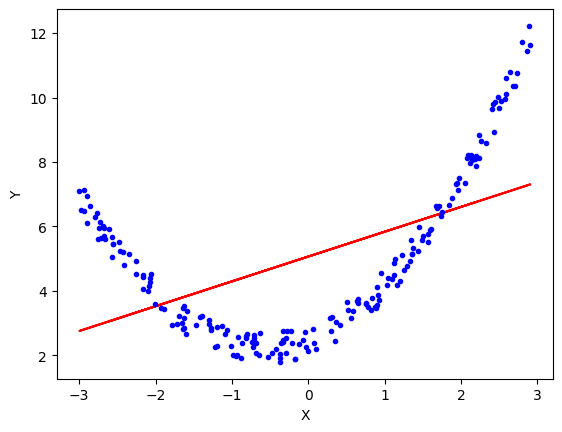

In [11]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X,y,'b.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## Applying Polynomial Linear Regression

In [14]:
# degree 2
poly = PolynomialFeatures(degree=2,include_bias=True)

X_train_trans  = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [17]:
# the transformed data
# We don't transform the ouput column

print(X_train[0])
print(X_train_trans[0])

[-2.60724192]
[ 1.         -2.60724192  6.79771042]


In [18]:
# Include bias parameter as well include_bias = True

In [19]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [20]:
y_pred = lr.predict(X_test_trans)

In [21]:
r2_score(y_test,y_pred)

0.9800743262945288

## The accuracy is improved drastically 

In [23]:
# Coefficients

print(lr.coef_)

[[0.         0.89382575 0.80095346]]


In [24]:
# Intercept

print(lr.intercept_)

[2.51806753]


In [25]:
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

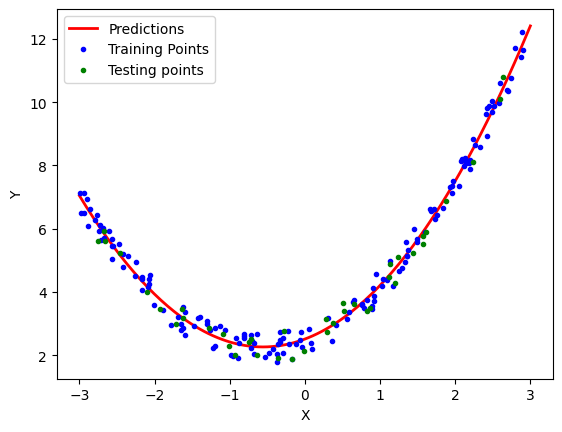

In [26]:
plt.plot(X_new,y_new,"r-",linewidth=2,label="Predictions")
plt.plot(X_train,y_train,"b.",label = "Training Points")
plt.plot(X_test,y_test,"g.",label="Testing points")

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [30]:
print("Powers",poly.powers_)

Powers [[0]
 [1]
 [2]]


In [31]:
print("input", poly.n_features_in_)

input 1


In [32]:
print("Output",poly.n_output_features_)

Output 3
